# Ejercicio Práctico de Koalas

In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import numpy as np
import pyspark.pandas as ps
import databricks.koalas as ks

c:\Users\heyde\.conda\envs\EYDER\lib\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


### Funciones básicas

In [2]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 

## Crea una serie de Koalas con [1, 3, 5, np.nan, 6, 8]

kser = ps.Series(pser)

## Pasa la serie de pandas pser a Koalas con el nombre de kser

In [3]:
## Ordena kser por el index
kser.sort_index(ascending=False)

5    8.0
4    6.0
3    NaN
2    5.0
1    3.0
0    1.0
dtype: float64

In [4]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                    'B': np.random.rand(5)})

## Genera un Dataframe de Koalas con el pdf de pandas y llamalo kdf
kdf = ps.from_pandas(pdf)

In [5]:
type(kdf)

pyspark.pandas.frame.DataFrame

### Visualización de datos

In [6]:
## Describe los datos de kdf
kdf.to_spark().show() 

c:\Users\heyde\.conda\envs\EYDER\lib\site-packages\pyspark\pandas\utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+------------------+--------------------+
|                 A|                   B|
+------------------+--------------------+
|0.5309138629920487|  0.7938294142825836|
|0.8219637125154932|  0.8422886140194374|
|0.3688088780095994|0.008873006391028171|
| 0.508476669147892|  0.5319242761542646|
|0.3138096297596271| 0.29362124665247946|
+------------------+--------------------+



In [7]:
## Ordena los datos de kdf por la columna B
kdf.sort_values(by='B')

,A,B
2,0.368809,0.008873
4,0.313810,0.293621
3,0.508477,0.531924
0,0.530914,0.793829
1,0.821964,0.842289


In [8]:
## Transpon los datos de kdf
kdf.T

,0,1,2,3,4
A,0.530914,0.821964,0.368809,0.508477,0.313810
B,0.793829,0.842289,0.008873,0.531924,0.293621


### Selección

In [9]:
kdf

,A,B
0,0.530914,0.793829
1,0.821964,0.842289
2,0.368809,0.008873
3,0.508477,0.531924
4,0.313810,0.293621


In [10]:
## Selecciona las varaibles A y B de Kdf
kdf[['A']]

,A
0,0.530914
1,0.821964
2,0.368809
3,0.508477
4,0.313810


In [11]:
kdf[['B']]

,B
0,0.793829
1,0.842289
2,0.008873
3,0.531924
4,0.293621


In [12]:
## Selecciona las filas 1, 2 de kdf
kdf.iloc[1:3]

,A,B
1,0.821964,0.842289
2,0.368809,0.008873


In [13]:
## Selecciona las filas 0, 1 y 2 de la variable B
kdf[['B']].loc[0:2]

,B
0,0.793829
1,0.842289
2,0.008873


### Aplicando funciones de Python a Koalas

In [14]:
## Aplica la funcion de Python de np.cumsum a kdf
kdf.cumsum()['A']

0    0.530914
1    1.352878
2    1.721686
3    2.230163
4    2.543973
Name: A, dtype: float64

In [15]:
## Eleva al cuadrado los valores de kdf
kdf*kdf

,A,B
0,0.281870,0.630165
1,0.675624,0.709450
2,0.136020,0.000079
3,0.258549,0.282943
4,0.098476,0.086213


### Agrupando datos

In [16]:
## Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A','B']).sum()

,
A,B
0.530914,0.793829
0.821964,0.842289
0.368809,0.008873
0.508477,0.531924
0.313810,0.293621


### Generando gráficos

In [17]:
# This is needed for visualizing plot on notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
#padf = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
kdf = ps.DataFrame({'speed':speed,'lifespan':lifespan},index=index)

In [23]:
kdf

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


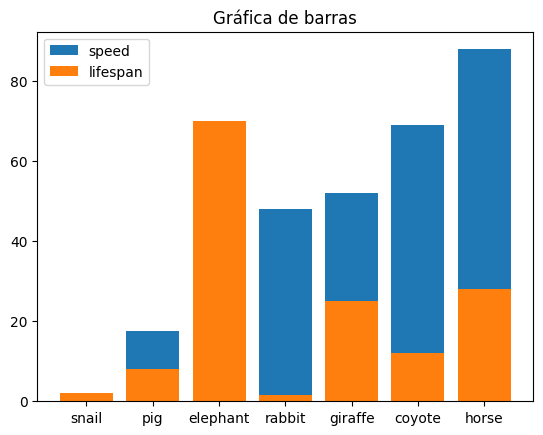

In [34]:
## Genera un grafico de barras con kdf y matplotlib
plt.title('Gráfica de barras')
plt.bar(index,speed,label='speed')
plt.bar(index,lifespan,label='lifespan')
plt.legend(loc='best')
plt.show()

In [ ]:
kdf = ks.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09',
                       freq='M'))

## Genera un grafico de areas con kdf y matplotlib

### Utilizando SQL en Koalas

In [ ]:
kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'pig': [20, 18, 489, 675, 1776],
                    'horse': [4, 25, 281, 600, 1900]})

In [ ]:
## Con una consulta SQL selecciona los datos donde pig sea mayor que 100

In [ ]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                    'sheep': [22, 50, 121, 445, 791],
                    'chicken': [250, 326, 589, 1241, 2118]})

In [ ]:
## Haz un inner join entre kdf y pdf en la vriable year, selecciona el pig y el chicken
## ordena los datos por pig y chicken


### Trabajando con PySpark

In [ ]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})

## Convierete el dataframe de Koalas a Dataframe de Spark
type(sdf)

In [ ]:
## muestra los datos